# 🍇 Analisis de Vinos🍷

### 📖 Importar todas las librerías

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 🛠 Configuración global de estilos:

In [6]:
sns.set_theme(style="whitegrid")  # Aplicar a todos los gráficos

### 🔍 Carga de Datos

In [4]:
import pandas as pd
df = pd.read_excel('Data.xlsx') 
df.head(100)

,TIPO,PAÍS,CATEGORÍA,MARCA,GENERO,SEGMENTO,TAMAÑO,FECHA,Valor,Litros
0,TINTO,Colombia,Reserve,MARQUEZ DE VARGAS,HOMBRE,RESTAURANTE FORMAL,"0,375 LT",2020-01-01,94729.659899,18.092
1,TINTO,Colombia,Reserve,MARQUEZ DE VARGAS,HOMBRE,HOTEL TODO INCLUIDO,"0,375 LT",2020-01-01,99014.944276,18.792
2,TINTO,Colombia,Reserve,MARQUEZ DE VARGAS,HOMBRE,MINIMERCADO,"0,375 LT",2020-01-01,51938.349028,9.604
3,TINTO,Colombia,Reserve,MARQUEZ DE VARGAS,HOMBRE,RESTAURANTE FORMAL,"0,375 LT",2020-01-01,64261.758963,9.277
4,TINTO,Colombia,Reserve,MARQUEZ DE VARGAS,HOMBRE,LICORERA ESTANDAR,"0,375 LT",2020-01-01,25031.941205,3.665
...,...,...,...,...,...,...,...,...,...,...
95,BLANCO,Colombia,Carmenere,RAMON BILBAO,HOMBRE,MAYORISTA JUNIOR,1 LT,2020-01-01,31192.219342,4.030
96,BLANCO,Colombia,Carmenere,PRADO REY,MUJER,MAYORISTA JUNIOR,1 LT,2020-01-01,165.176074,0.011
97,ROSADO,Colombia,Merlot,LA CELIA,MUJER,RESTAURANTE ELITE,1 LT,2020-01-01,27481.949340,1.909
98,BLANCO,Colombia,Carmenere,PRADO REY,MUJER,RESTAURANTE ELITE,1 LT,2020-01-01,252.858171,0.017


In [7]:
try:
    df = pd.read_excel('Data.xlsx', engine='openpyxl')  # Motor explícito para .xlsx
except FileNotFoundError:
    print("Error: Archivo no encontrado.")

## Estadísticas Descriptivas

### 📊 Medidas de Tendencia Central

In [8]:
from scipy import stats
df_numerico = df.select_dtypes(include=['number'])
medidas_tendencia = pd.DataFrame({
    "Media": df_numerico.mean(),
    "Mediana": df_numerico.median(),
    "Moda": df_numerico.mode().iloc[0]
})

In [9]:
moda = df_numerico.apply(lambda x: stats.mode(x, keepdims=False)[0])

### 📈 Medidas de Dispersión

In [10]:
medidas_dispersion = pd.DataFrame({
    "Varianza": df_numerico.var(),
    "Desviación estándar": df_numerico.std(),
    "Rango": df_numerico.max() - df_numerico.min(),
    "Coeficiente de variación": df_numerico.std() / df_numerico.mean()
})

In [11]:
cv = df_numerico.std() / df_numerico.mean().replace(0, 1e-10)

### 📉 Gráficos de Línea

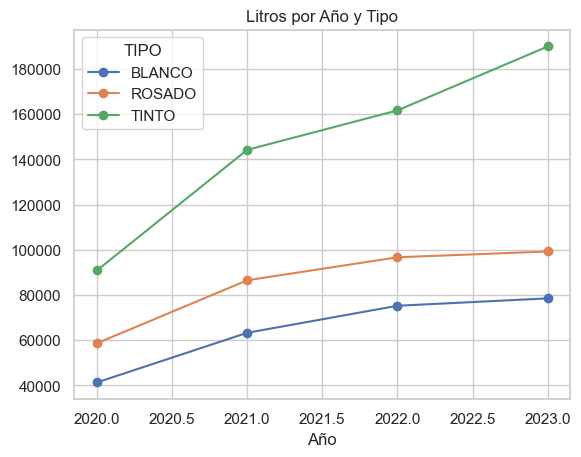

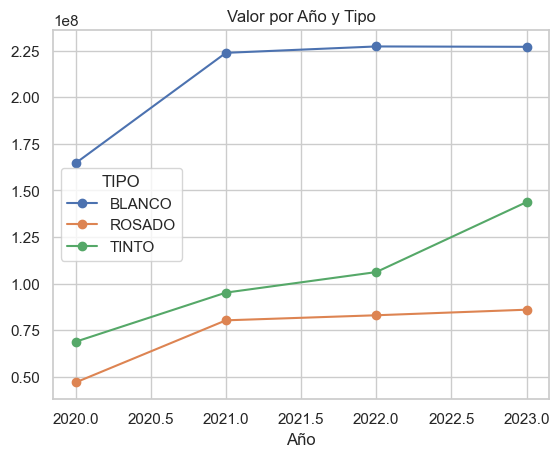

In [18]:
def grafico_linea(df, columna_y, titulo):
    df['Año'] = pd.to_datetime(df['FECHA']).dt.year
    df_pivot = df.pivot_table(index='Año', columns='TIPO', values=columna_y, aggfunc='sum')
    df_pivot.plot(kind='line', title=titulo, marker='o')
    plt.show()

grafico_linea(df, 'Litros', 'Litros por Año y Tipo')
grafico_linea(df, 'Valor', 'Valor por Año y Tipo')

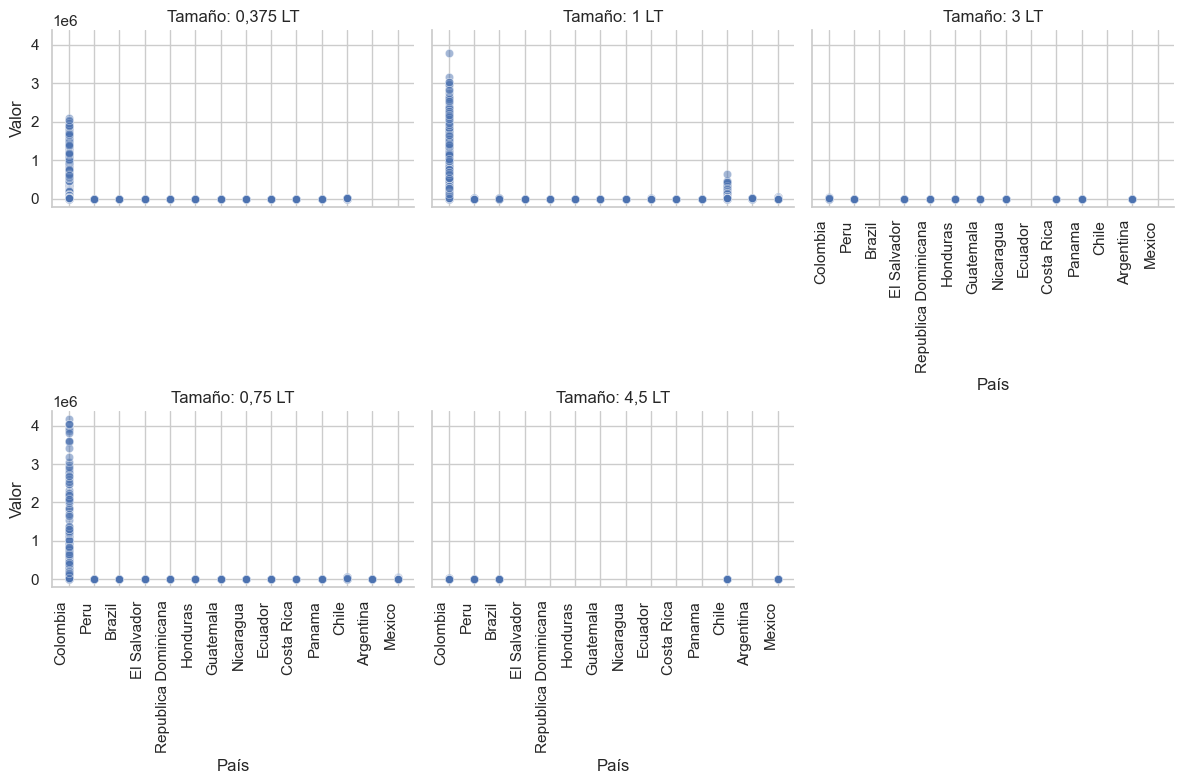

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la estructura de subgráficos por cada "TAMAÑO"
g = sns.FacetGrid(df, col="TAMAÑO", col_wrap=3, height=4, sharey=True)

# Crear los gráficos de dispersión en cada subgráfico
g.map(sns.scatterplot, "PAÍS", "Valor", alpha=0.5, color='b')

# Ajustar los títulos y etiquetas
g.set_titles(col_template="Tamaño: {col_name}") # Título en cada gráfico
g.set_axis_labels("País", "Valor") # Etiquetas comunes

# Rotar y alinear las etiquetas del eje x en cada subgráfico
for ax in g.axes.flat:
    plt.sca(ax)  # Establecer el eje actual para trabajar en él
    plt.xticks(rotation=90, ha='right')  # Rotar 90 grados y alinear a la derecha

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

### 🧩 Mapa de Calor

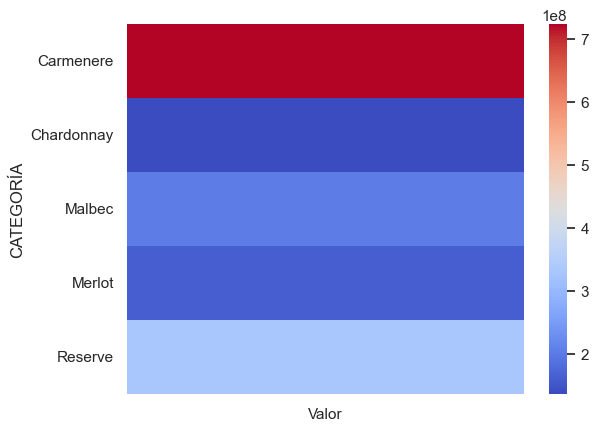

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Crear una tabla de calor adecuada
tabla_calor = df.pivot_table(index='CATEGORÍA', values='Valor', aggfunc='sum')
sns.heatmap(tabla_calor, cmap="coolwarm")

plt.show()

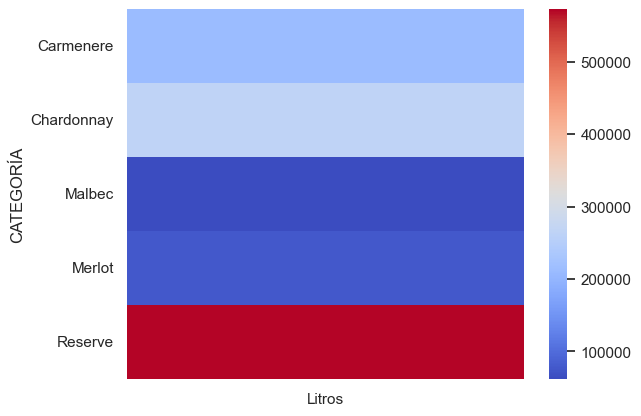

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Crear una tabla de calor adecuada
tabla_calor = df.pivot_table(index='CATEGORÍA', values='Litros', aggfunc='sum')
sns.heatmap(tabla_calor, cmap="coolwarm")

plt.show()

##  Modelo de Regresión

In [28]:
from sklearn.linear_model import LinearRegression
X = df[['Litros']]
y = df['Valor']
# ... (entrenamiento y evaluación)

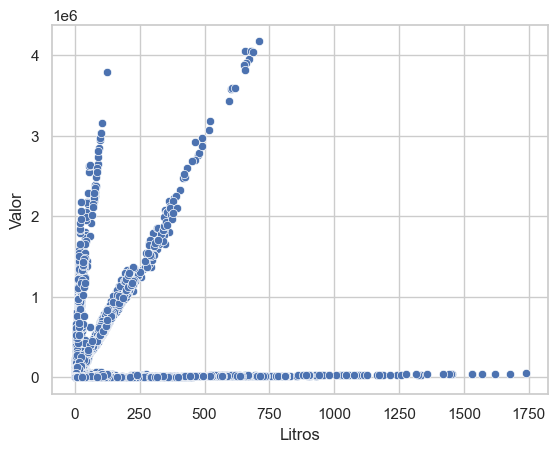

In [29]:
sns.scatterplot(x='Litros', y='Valor', data=df)
plt.show()

In [30]:
import statsmodels.api as sm
X = sm.add_constant(X)  # Incluye el intercepto
modelo = sm.OLS(y, X).fit()
print(modelo.summary())  # Muestra R², p-valores, etc.

                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     6948.
Date:               mié, 12 mar. 2025   Prob (F-statistic):               0.00
Time:                        00:04:21   Log-Likelihood:            -1.7250e+06
No. Observations:              133511   AIC:                         3.450e+06
Df Residuals:                  133509   BIC:                         3.450e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6972.0907    276.257     25.238      0.0